# Beak Data Challenge - Data Analyst
## Exploration with networkx

In [6]:
### This is a terrible approach use only in testing
import sys
sys.path.insert(1, 'G:\\My Drive\\Luis Eduardo Higuera Calderon\\Proyectos\\Beek.io\\Beak Data Challenge\\src')

from apps.visual_backend import DashPlotting
from backend import runQuery

import pandas as pd
import numpy as np

# Extract Data

In [16]:
# query information needed for create the graph
df_all = runQuery(f"""
    WITH books(book_id, category_name_1 ) AS (
        SELECT a.id
            , bc.name
            , a.actual_size
            , a.grade_level
            , a."language"
            --, a.book_category_codes[2]
            --, a.book_category_codes[3]	
        FROM audiobook a
        LEFT JOIN book_categories bc
        ON a.book_category_codes[1]=bc.book_cateogory_code
    )
    SELECT a.id AS transaction_id
        , a.created_at AS transaction_created_at
        , a.seconds AS seconds_played
        , a.user_id
        , u.created_at AS user_created_at
        , u.last_sign_in_at
        , u.gender
        , u.has_seen_onboarding 
        , u.has_been_subscribed 
        , b.book_id
        , b.category_name_1
        , b.actual_size
        , b.grade_level
        , b."language"
    FROM audiobook_plays a
    LEFT JOIN users u
    ON a.user_id = u.id
    LEFT JOIN books b
    ON a.audiobook_id = b.book_id;
""")

In [17]:
df_all

,transaction_id,transaction_created_at,seconds_played,user_id,user_created_at,last_sign_in_at,gender,has_seen_onboarding,has_been_subscribed,book_id,category_name_1,actual_size,grade_level,language
0,532420,2019-02-16 05:59:13.296125,106.111,943999,2019-01-27 18:42:50.811709,2019-03-01 13:24:28.157598,unknown,False,True,22,Juvenile Fiction / Animals / General,104112568,Grades 3 - 6,English
1,498409,2019-01-18 08:51:46.687433,219.025,923997,2019-01-17 22:43:30.506577,2019-06-25 13:51:27.358939,unknown,False,True,450,Fiction / Mystery & Detective / Private Invest...,29502483,Adult,Spanish
2,536069,2019-02-20 15:42:18.991913,26.317,962848,2019-02-20 01:23:58.701305,2019-03-14 19:24:12.887651,unknown,False,True,693,Science / Life Sciences / General,440527386,Adult,English
3,575136,2019-04-05 22:42:03.704461,9.905,986286,2019-03-30 17:24:52.760746,2019-07-01 04:03:10.322979,man,True,True,693,Science / Life Sciences / General,440527386,Adult,English
4,576306,2019-04-06 23:43:02.256191,1.359,986286,2019-03-30 17:24:52.760746,2019-07-01 04:03:10.322979,man,True,True,693,Science / Life Sciences / General,440527386,Adult,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105641,580098,2019-04-10 15:41:49.226068,1136.904,993407,2019-04-10 14:30:35.601445,2019-04-19 22:24:30.728828,unknown,True,True,324029,None,56636672,Young Adult,Spanish
105642,580103,2019-04-10 15:48:55.684699,147.944,993407,2019-04-10 14:30:35.601445,2019-04-19 22:24:30.728828,unknown,True,True,324029,None,56636672,Young Adult,Spanish
105643,580395,2019-04-10 22:22:23.832357,248.562,993407,2019-04-10 14:30:35.601445,2019-04-19 22:24:30.728828,unknown,True,True,324029,None,56636672,Young Adult,Spanish
105644,580059,2019-04-10 14:52:41.326067,661.643,993407,2019-04-10 14:30:35.601445,2019-04-19 22:24:30.728828,unknown,True,True,324029,None,56636672,Young Adult,Spanish


In [4]:
df_all.to_csv('beek_db.csv')

In [3]:
df_all.tail()

,user_id,gender,book_id,actual_size,grade_level,language,time_listened,category
88531,988127,unknown,316421,256061449,Adult,Spanish,2784.087,Fiction / Literary
88532,988127,unknown,316421,256061449,Adult,Spanish,47.871,Fiction / Literary
88533,961176,unknown,16170,571042342,Adult,English,573.875,Fiction / Romance / Erotica
88534,991700,unknown,223329,430700832,Adult,Spanish,0.986,Fiction / Romance / General
88535,991700,unknown,223329,430700832,Adult,Spanish,669.732,Fiction / Romance / General


In [4]:
# Transform in graphs and plots
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt

bipartite_graph = nx.Graph()

# Bipartite network users and audiolibros weigthed by time listening

In [5]:
# Add nodes with node attribute "bipartite"
bipartite_graph.add_nodes_from(list(pd.unique(df_all["user_id"])), bipartite=0)
bipartite_graph.add_nodes_from(list(pd.unique(df_all["book_id"])), bipartite=1)
bipartite_graph.add_nodes_from(list(pd.unique(df_all["category"])), bipartite=2)

# Add edges in a list of tuples of nodes
n = len(df_all.index)
bipartite_graph.add_edges_from([list(df_all[["user_id","book_id"]].iloc[i]) for i in range(n)]) # verify n+1 or just n

In [6]:
list(bipartite_graph.nodes)

[877003,
 791003,
 839397,
 879268,
 881890,
 836204,
 884108,
 888181,
 57017,
 862884,
 53930,
 868018,
 375982,
 436959,
 859372,
 893175,
 893763,
 892979,
 876153,
 26125,
 870949,
 882475,
 813397,
 884990,
 895548,
 825839,
 19580,
 392623,
 733930,
 50,
 513848,
 890097,
 862190,
 897048,
 899154,
 899179,
 898760,
 868300,
 893550,
 884092,
 899292,
 892768,
 898694,
 793421,
 9619,
 875476,
 838492,
 845010,
 72802,
 877864,
 896939,
 877793,
 789467,
 828875,
 831815,
 856772,
 899790,
 853145,
 899947,
 899954,
 897085,
 899956,
 899983,
 55,
 900004,
 16863,
 899548,
 267451,
 900236,
 900277,
 878721,
 894725,
 898106,
 840711,
 900517,
 856293,
 527831,
 897376,
 54520,
 882480,
 901047,
 899903,
 897681,
 896529,
 898614,
 900190,
 877758,
 897170,
 901885,
 866988,
 876855,
 902324,
 900940,
 888176,
 790472,
 902543,
 902550,
 842107,
 902556,
 899542,
 902337,
 902172,
 902365,
 902724,
 902785,
 903026,
 903258,
 875226,
 903061,
 789091,
 903500,
 880953,
 899394,


## Book category more popular

## Recomend a Book

## EJemplo de red bipartita 

{('s1',
  's2'): Text(-0.41330140750657696, 0.046235480948900134, "{'weight': 1}"),
 ('s1',
  's3'): Text(-0.6487365980125848, -0.054829936466683216, "{'weight': 2}"),
 ('s2',
  's3'): Text(-0.39971697226825814, -0.11508618718468937, "{'weight': 1}"),
 ('s2',
  's5'): Text(0.14873659801258476, 0.012462594871731545, "{'weight': 1}"),
 ('s4', 's5'): Text(0.73087748889371, 0.0618403213512363, "{'weight': 1}")}

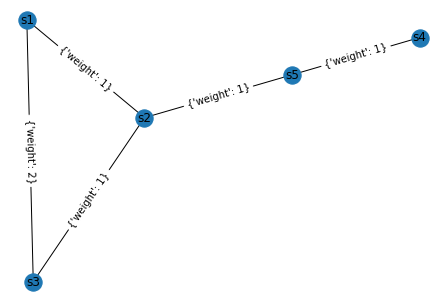

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
g=nx.Graph()
g.add_nodes_from(['s1','s2','s3','s4','s5'],bipartite=0)
g.add_nodes_from(['t1','t2','t3','t4'],bipartite=1)
g.add_edges_from([('s1','t1'),('s1','t4'),('s2','t1'),('s2','t2'),('s3','t1'),('s3','t4'),('s4','t3'),('s5','t2'),('s5','t3')])
l=bipartite.weighted_projected_graph(g,['s1','s2','s3','s4','s5'])
pos = nx.spring_layout(l)
nx.draw(l, pos = pos, with_labels=True)
nx.draw_networkx_edge_labels(l, pos)